# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [8]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\Abacus
[nltk_data]     Muntu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")


In [225]:
# Create a newsapi client

newsapi = NewsApiClient(api_key = api_key)
print(newsapi)

In [226]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by='relevancy'
)

In [12]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by='relevancy'
)

In [20]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []

for article in btc_articles['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']

        btc_sentiment.append({
            'Text': text,
            'Date': date,
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu
        })

    except AttributeError:
        pass

bitcoin_df = pd.DataFrame(btc_sentiment)
bitcoin_df.head()

,Text,Date,Compound,Positive,Negative,Neutral
0,Even if you arent paying attention to Bitcoin ...,2022-02-09,0.5859,0.124,0.000,0.876
1,El Salvador introduced Bitcoin as a legal tend...,2022-01-25,0.3182,0.105,0.000,0.895
2,Israeli national Tal Prihar pled guilty to rou...,2022-01-27,-0.3182,0.045,0.084,0.871
3,Netflix\r\n is making a docuseries about one o...,2022-02-11,-0.7096,0.000,0.169,0.831
4,British entrepreneur and financier Richard ODe...,2022-01-26,0.6808,0.185,0.000,0.815


In [24]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = []

for article in eth_articles['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']

        eth_sentiment.append({
            'Text': text,
            'Date': date,
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu
        })

    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(eth_sentiment)
ethereum_df.head()

,Text,Date,Compound,Positive,Negative,Neutral
0,If people who buy cryptocurrencies intended on...,2022-02-10,-0.2023,0.039,0.062,0.899
1,"Technical analysis isnt a perfect tool, but it...",2022-02-17,-0.2498,0.000,0.059,0.941
2,This enables an L1 platform to bootstrap its n...,2022-02-09,0.0000,0.000,0.000,1.000
3,"The means-and-ends moralists, or non-doers, al...",2022-01-31,0.0000,0.000,0.000,1.000
4,Coinbase reported that the share of trading vo...,2022-02-25,0.6705,0.188,0.000,0.812


In [25]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.181095,0.090800,0.041600,0.867600
std,0.459473,0.059023,0.057329,0.061515
min,-0.709600,0.000000,0.000000,0.729000
25%,-0.225725,0.045750,0.000000,0.834750
50%,0.295700,0.092500,0.000000,0.873500
75%,0.585900,0.145250,0.085500,0.901500
max,0.778300,0.185000,0.169000,1.000000


In [26]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.100645,0.059100,0.026400,0.914550
std,0.351331,0.074079,0.048366,0.088084
min,-0.680800,0.000000,0.000000,0.766000
25%,-0.025675,0.000000,0.000000,0.822500
50%,0.000000,0.042500,0.000000,0.942500
75%,0.232225,0.082750,0.041750,1.000000
max,0.834100,0.234000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

## Ans: Bitcoin has highest mean positive score

Q: Which coin had the highest compound score?

## Ans: Ethereum has highest compound score

Q. Which coin had the highest positive score?

## Ans: Ethereum has highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [54]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [87]:
# Instantiate the lemmatizer

lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary

stop.append("u")
stop.append("is")
stop.append('....')
stop.append("\'")
stop.append("'it'")
stop.append("'s")
stop.append('char')
stop.append("&nbsp")
stop.append("\r")
stop.append("\n")
stop.append("[")
stop.append('``')
stop.append("'if'")
stop.append("if")
stop = set(stop)

In [88]:
# Complete the tokenizer function
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [89]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

bitcoin_df['Token']=bitcoin_df['Text'].apply(tokenizer)
bitcoin_df.head()

,Text,Date,Compound,Positive,Negative,Neutral,Token
0,Even if you arent paying attention to Bitcoin ...,2022-02-09,0.5859,0.124,0.000,0.876,"[Even, arent, paying, attention, Bitcoin, cryp..."
1,El Salvador introduced Bitcoin as a legal tend...,2022-01-25,0.3182,0.105,0.000,0.895,"[El, Salvador, introduced, Bitcoin, legal, ten..."
2,Israeli national Tal Prihar pled guilty to rou...,2022-01-27,-0.3182,0.045,0.084,0.871,"[Israeli, national, Tal, Prihar, pled, guilty,..."
3,Netflix\r\n is making a docuseries about one o...,2022-02-11,-0.7096,0.000,0.169,0.831,"[Netflix, making, docuseries, one, worst, rapp..."
4,British entrepreneur and financier Richard ODe...,2022-01-26,0.6808,0.185,0.000,0.815,"[British, entrepreneur, financier, Richard, OD..."


In [90]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df['Token']=ethereum_df['Text'].apply(tokenizer)
ethereum_df.head()

,Text,Date,Compound,Positive,Negative,Neutral,Token
0,If people who buy cryptocurrencies intended on...,2022-02-10,-0.2023,0.039,0.062,0.899,"[people, buy, cryptocurrencies, intended, hold..."
1,"Technical analysis isnt a perfect tool, but it...",2022-02-17,-0.2498,0.000,0.059,0.941,"[Technical, analysis, isnt, perfect, tool, may..."
2,This enables an L1 platform to bootstrap its n...,2022-02-09,0.0000,0.000,0.000,1.000,"[enables, L1, platform, bootstrap, national, e..."
3,"The means-and-ends moralists, or non-doers, al...",2022-01-31,0.0000,0.000,0.000,1.000,"[means-and-ends, moralist, non-doers, always, ..."
4,Coinbase reported that the share of trading vo...,2022-02-25,0.6705,0.188,0.000,0.812,"[Coinbase, reported, share, trading, volume, e..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [93]:
from collections import Counter
from nltk import ngrams

In [116]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(bitcoin_df.Text.str.cat()), N)
Counter(grams).most_common(20)

[(('El', 'Salvador'), 3),
 (('Illustration', 'Alex'), 3),
 (('Alex', 'Castro'), 3),
 (('Castro', 'Verge'), 3),
 (('char', 'Feb'), 3),
 (('Reuters', 'Bitcoin'), 3),
 (('alongside', 'US'), 2),
 (('US', 'dollar'), 2),
 (('International', 'Monetary'), 2),
 (('Monetary', 'Fund'), 2),
 (('Mr.', 'Lichtensteins'), 2),
 (('Lichtensteins', 'wallet'), 2),
 (('Even', 'arent'), 1),
 (('arent', 'paying'), 1),
 (('paying', 'attention'), 1),
 (('attention', 'Bitcoin'), 1),
 (('Bitcoin', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'might'), 1),
 (('might', 'noticed'), 1),
 (('noticed', 'value'), 1)]

In [118]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(ethereum_df.Text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'Feb'), 4),
 (('324', 'million'), 4),
 (('char', 'version'), 3),
 (('version', 'article'), 3),
 (('article', 'published'), 3),
 (('published', 'TIME'), 3),
 (('TIME', '’'), 3),
 (('’', 'newsletter'), 3),
 (('newsletter', 'Metaverse'), 3),
 (('Metaverse', 'Subscribe'), 3),
 (('Subscribe', 'weekly'), 3),
 (('weekly', 'guide'), 3),
 (('guide', 'future'), 3),
 (('find', 'past'), 3),
 (('past', 'issue'), 3),
 (('issue', 'newsletter'), 3),
 (('trading', 'volume'), 2),
 (('profile', 'picture'), 2),
 (('char', 'Online'), 2),
 (('Online', 'thief'), 2)]

In [119]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [112]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [132]:
top_10_btc = ngrams(tokenizer(bitcoin_df.Text.str.cat()), N)
token_count(top_10_btc, 10)

[(('El', 'Salvador'), 3),
 (('Illustration', 'Alex'), 3),
 (('Alex', 'Castro'), 3),
 (('Castro', 'Verge'), 3),
 (('char', 'Feb'), 3),
 (('Reuters', 'Bitcoin'), 3),
 (('alongside', 'US'), 2),
 (('US', 'dollar'), 2),
 (('International', 'Monetary'), 2),
 (('Monetary', 'Fund'), 2)]

In [122]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
top_10_eth = ngrams(tokenizer(ethereum_df.Text.str.cat()), N)
token_count(top_10_eth, 10)

[(('char', 'Feb'), 4),
 (('324', 'million'), 4),
 (('char', 'version'), 3),
 (('version', 'article'), 3),
 (('article', 'published'), 3),
 (('published', 'TIME'), 3),
 (('TIME', '’'), 3),
 (('’', 'newsletter'), 3),
 (('newsletter', 'Metaverse'), 3),
 (('Metaverse', 'Subscribe'), 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [124]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

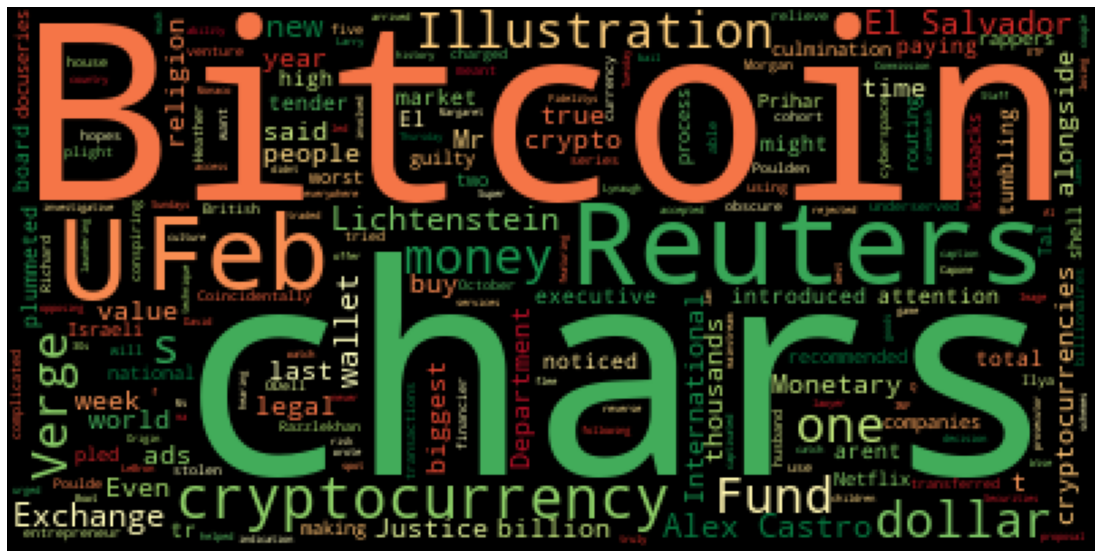

In [213]:
# Generate the Bitcoin word cloud
# Color palltet BrBG PiYG PRGn PuOr RdBu RdGy RdYlBu RdYlGn
# Generate Cloud

wordcount = WordCloud(colormap="RdYlGn", background_color='black').generate(bitcoin_df.Text.str.cat())
wordcount
plt.axis("off")
plt.imshow(wordcount)

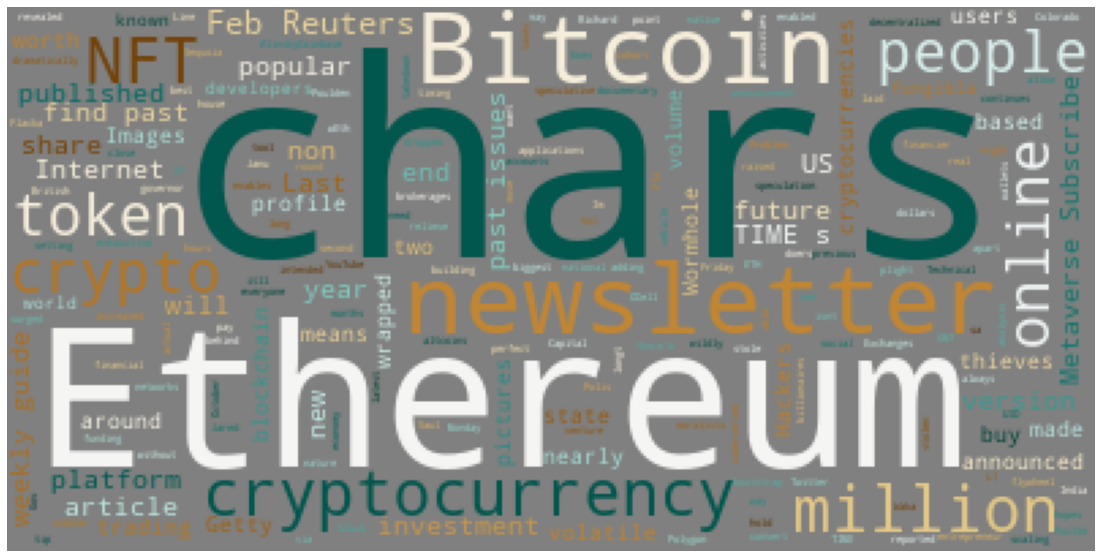

In [206]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
# Color palltet BrBG PiYG PRGn PuOr RdBu RdGy RdYlBu RdYlGn
wordcloud = WordCloud(colormap="BrBG", background_color='gray').generate(ethereum_df.Text.str.cat())
wordcloud 
plt.axis("off")
plt.imshow(wordcloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [214]:
import spacy
from spacy import displacy

In [215]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [216]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [217]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_text = (' '.join(bitcoin_df['Text']))
bitcoin_text

'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars] El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars] Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex Castro / The Verge\r\nIn the culmination of a two-year legal process, … [+1448 chars] Netflix\r\n is making a docuseries about one of the worst rappers of all time\r\n. Coincidentally, Heather "Razzlekhan" Morgan and her husband, Ilya Lichtenstein, were charged this week with conspiring t… [+1432 chars] British entrepreneur and financier Richard ODell Poulden hopes that his new venture will relieve the plight of an underserved 

In [218]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_doc = nlp(bitcoin_text)
bitcoin_doc

# Add a title to the document
# YOUR CODE HERE!
bitcoin_doc.user_data["Title"] = "Bitcoin NER visualization"

In [219]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_doc, style='ent',jupyter=True)

In [220]:
# List all Entities
# YOUR CODE HERE!
# YOUR CODE HERE!
len(bitcoin_doc.ents)

# List all Entities

# pprint([(X.doc, X.label_) for X in bitcoin_doc.ents])
pprint([(X.text, X.label_) for X in bitcoin_doc.ents])


[('last week', 'DATE'),
 ('3', 'MONEY'),
 ('El Salvador', 'GPE'),
 ('US', 'GPE'),
 ('2021', 'DATE'),
 ('Alex Castro', 'PERSON'),
 ('Verge', 'ORG'),
 ('The International Monetary Fund’s', 'ORG'),
 ('El', 'ORG'),
 ('Israeli', 'NORP'),
 ('Tal Prihar', 'PERSON'),
 ('Illustration', 'ORG'),
 ('Alex Castro', 'PERSON'),
 ('Verge', 'ORG'),
 ('two-year', 'DATE'),
 ('Netflix', 'ORG'),
 ('about one', 'CARDINAL'),
 ('Ilya Lichtenstein', 'PERSON'),
 ('this week', 'DATE'),
 ('British', 'NORP'),
 ('Richard ODell', 'PERSON'),
 ('house', 'ORG'),
 ('October', 'DATE'),
 ('Poulde', 'GPE'),
 ('the last five years', 'DATE'),
 ('about 25,000', 'CARDINAL'),
 ('Lichtensteins', 'PERSON'),
 ('the Department of Justice', 'ORG'),
 ('Monaco', 'PERSON'),
 ('Al Capone', 'LOC'),
 ('Margaret Lynaugh', 'PERSON'),
 ('Bitcoin', 'PERSON'),
 ('El Salvador', 'GPE'),
 ('US', 'GPE'),
 ('The International Monetary Fund', 'ORG'),
 ('El Salvador', 'GPE'),
 ('Reuters', 'ORG'),
 ('Jan 26', 'DATE'),
 ('Reuters', 'ORG'),
 ('The U.S. S

---

### Ethereum NER

In [221]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_text = (' '.join(ethereum_df['Text']))
ethereum_text

'If people who buy cryptocurrencies intended only to hold on to them as speculative investments, there\'d be no real need for crypto wallets. Exchanges and online brokerages that convert dollars to, sa… [+3031 chars] Technical analysis isnt a perfect tool, but it may point the way for Ethereum\r\nEthereum\xa0(ETH-USD\r\n) continues to be a volatile crypto investment. Crypto is volatile by nature Im not setting it apart … [+3612 chars] This enables an L1 platform to bootstrap its national economy over time through a flywheel between financial speculation around its native token and actual building of applications and activities in … [+4057 chars] The means-and-ends moralists, or non-doers, always end up on their ends\r\nwithout any means.\r\n-- Saul Alinsky Coinbase reported that the share of trading volume for ethereum and other altcoins increased last year, while bitcoin\'s share dropped dramatically.\xa0\r\nBetween 2020 and 2021, ethereum trading volume in… [+1187 chars] People in Co

In [222]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

ethereum_doc = nlp(ethereum_text)
ethereum_doc

# Add a title to the document
# YOUR CODE HERE!
ethereum_doc.user_data["Title"] = "Ethereum NER visualization"

In [223]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum_doc, style="ent", jupyter=True)

In [224]:
# List all Entities
# YOUR CODE HERE!
len(ethereum_doc.ents)

# List all Entities

# pprint([(X.doc, X.label_) for X in ethereum_doc.ents])
pprint([(X.text, X.label_) for X in ethereum_doc.ents])

[('Ethereum', 'ORG'),
 ('ETH-USD', 'ORG'),
 ('Crypto', 'PERSON'),
 ('Saul Alinsky Coinbase', 'PERSON'),
 ('last year', 'DATE'),
 ('Between 2020 and 2021', 'DATE'),
 ('Colorado', 'GPE'),
 ('the middle of this year', 'DATE'),
 ('US', 'GPE'),
 ('Jared Polis', 'PERSON'),
 ('Last night', 'TIME'),
 ('Twitter', 'PRODUCT'),
 ('Ethereum', 'ORG'),
 ('second', 'ORDINAL'),
 ('two months', 'DATE'),
 ('NFT', 'ORG'),
 ('Feb 7', 'DATE'),
 ('Reuters', 'ORG'),
 ('Monday', 'DATE'),
 ('$450 million', 'MONEY'),
 ('Sequoia Capital India', 'ORG'),
 ('nearly $324 million', 'MONEY'),
 ('Getty Images', 'PERSON'),
 ('more than $324 million', 'MONEY'),
 ('Wormhole', 'PERSON'),
 ('120,000', 'CARDINAL'),
 ('wEth', 'ORG'),
 ('Ethereum', 'ORG'),
 ('nearly $324 million', 'MONEY'),
 ('Getty Images', 'PERSON'),
 ('more than $324 million', 'MONEY'),
 ('Wormhole', 'PERSON'),
 ('over two hours', 'TIME'),
 ('YouTube', 'ORG'),
 ('Waka Flacka Fla', 'ORG'),
 ('British', 'NORP'),
 ('Richard ODell', 'PERSON'),
 ('house', 'ORG'),

---